### Activity 4  Logistic Regression with Binary Value/Outcome
#### Members:
 1. __TUGADO, JUDE PHILIPPE M.__		
 2. __ALAMO,  ED CHRISTIAN A.__		
 3. __BONITA, KIRBY H.__		
 4. __RODRIGUEZ, AARON LANCE D.__		

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [121]:
data = pd.read_csv("student_pass.csv")
df = pd.DataFrame(data)
df = data.drop(columns = 'Student')
print(df.head())

   Hours_Studied  Pass
0           6.39     1
1           0.25     0
2           2.23     1
3           6.77     1
4           8.92     1


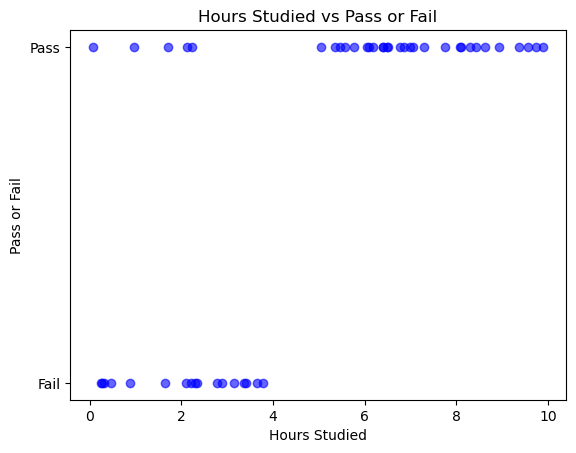

In [125]:
plt.scatter(df['Hours_Studied'], df['Pass'], color='blue', alpha=0.6)
plt.title('Hours Studied vs Pass or Fail')
plt.xlabel('Hours Studied')
plt.ylabel('Pass or Fail')
plt.yticks([0, 1], ['Fail', 'Pass'])  # Label the y-axis ticks
plt.show()

In [114]:
X = df[['Hours_Studied']]
y = df['Pass']
print(X.head())
print(y.head())

   Hours_Studied
0           6.39
1           0.25
2           2.23
3           6.77
4           8.92
0    1
1    0
2    1
3    1
4    1
Name: Pass, dtype: int64


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print(X_test.shape)
print(y_test.shape)

(10, 1)
(10,)


In [129]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
y_pred = model.predict(X_test)

In [135]:
model.score(X_test,y_test)

0.8

In [137]:
print(confusion_matrix(y_test,y_pred))

[[4 0]
 [2 4]]


In [154]:
X_range = np.linspace(X['Hours_Studied'].min(), X['Hours_Studied'].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1] 


C:\Users\Ron\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
